# Maps of differential reddening

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import glob
import seaborn as sns
from scipy import stats
import pandas as pd


In [26]:
def binned_heatmap(
    df: pd.DataFrame,
    cluster_name: str,
    x_col: str = "RA_ICRS",
    y_col: str = "DE_ICRS",
    z_col: str = "median_delta_abscissa",
    nBins: int = 15
) -> None:
    
    """
    Create a heat map for binned data using z_value as the color
    reference: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    """

    df = df.copy()

    cuts = pd.DataFrame({str(feature) + '_Bin' : pd.cut(df[feature], nBins) for feature in [x_col, y_col]})
    means = df.join(cuts).groupby( list(cuts) ).mean()
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    plt.clf()
    sns.heatmap(means[z_col]) 
    plt.title(f'{cluster_name} mean:{df[z_col].mean():.3f}, n:{len(df)}')
    plt.show()
    #plt.savefig(f"plots/maps/{cluster_name}_map.png")
    #plt.close()


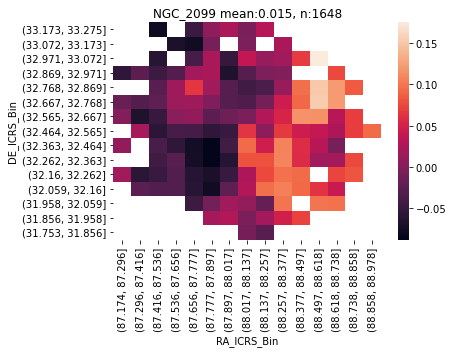

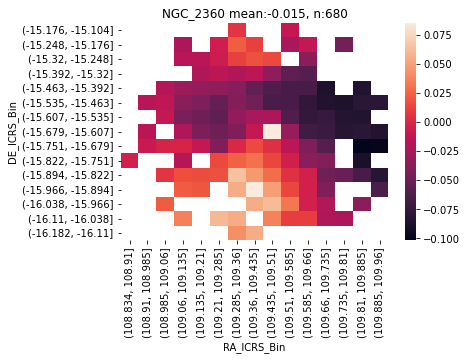

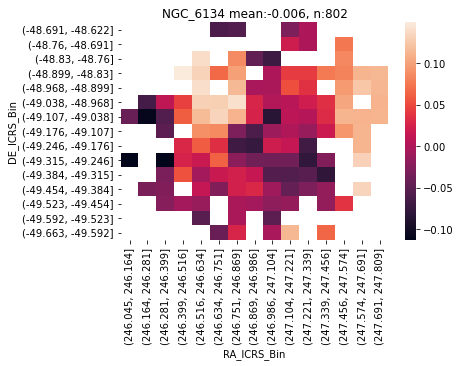

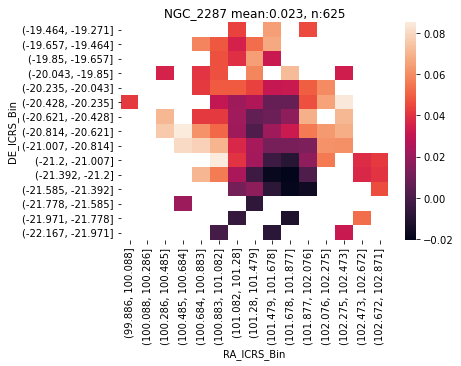

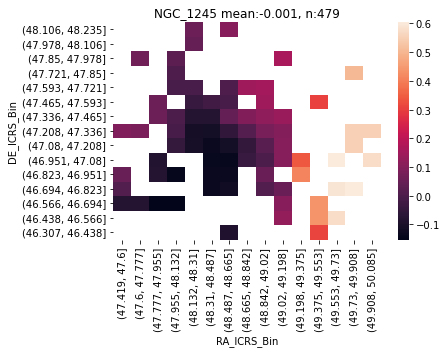

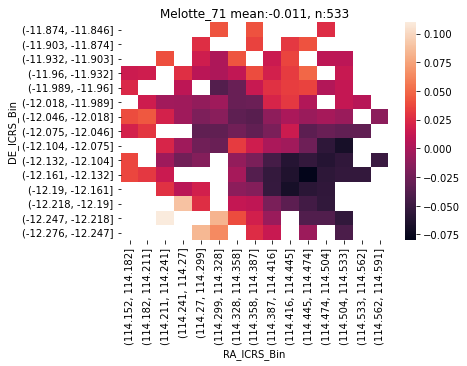

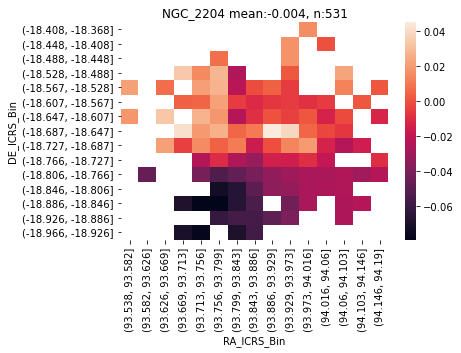

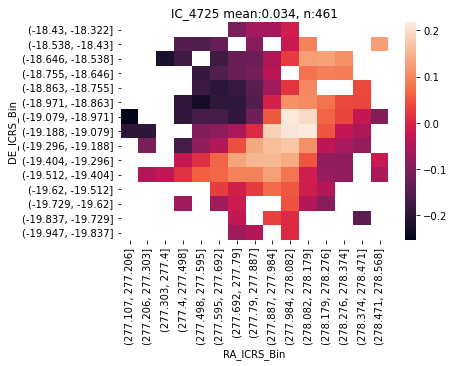

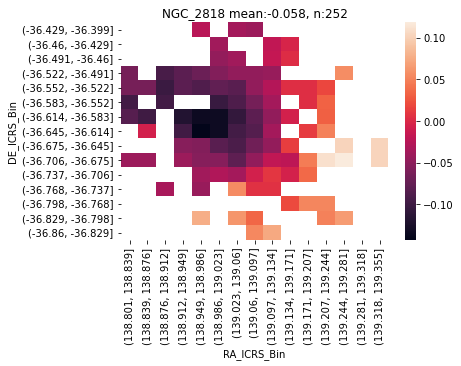

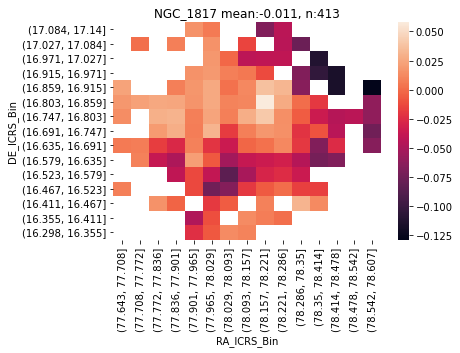

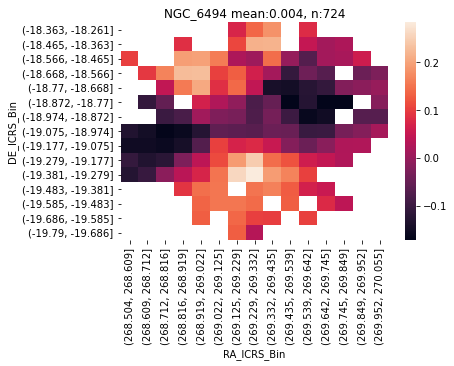

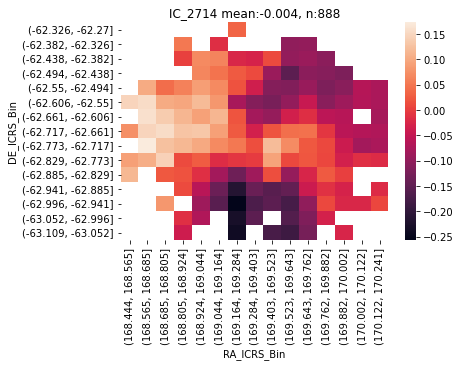

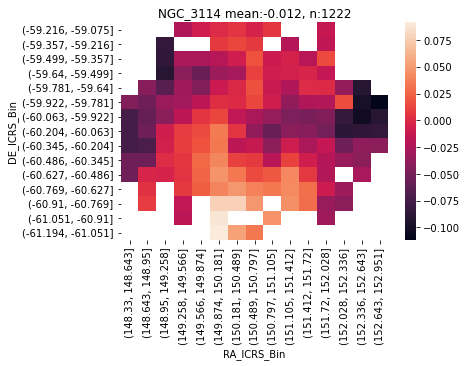

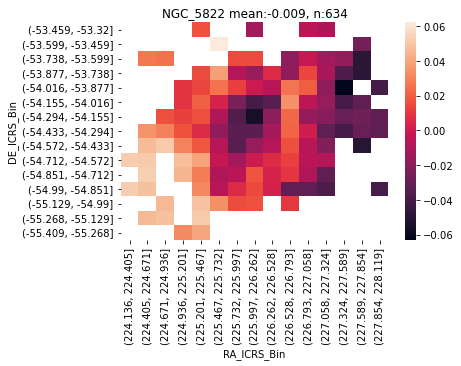

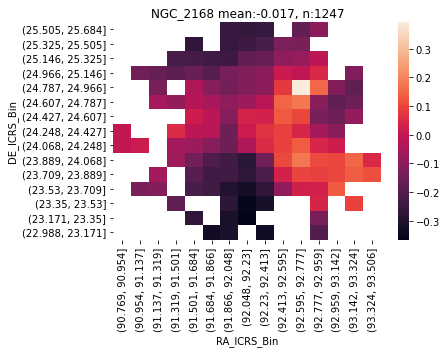

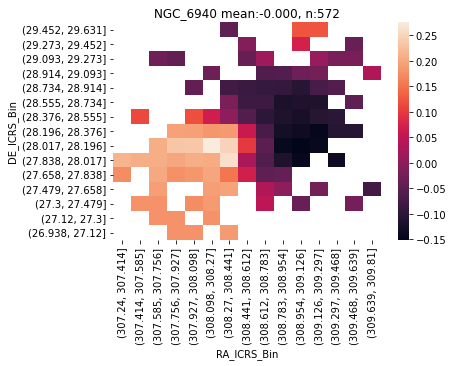

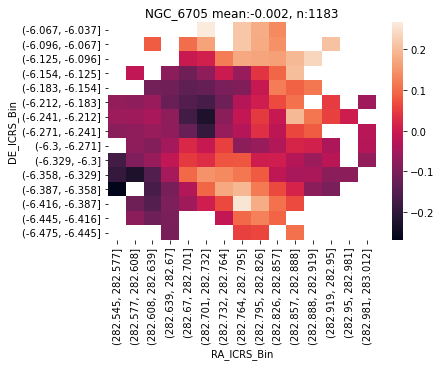

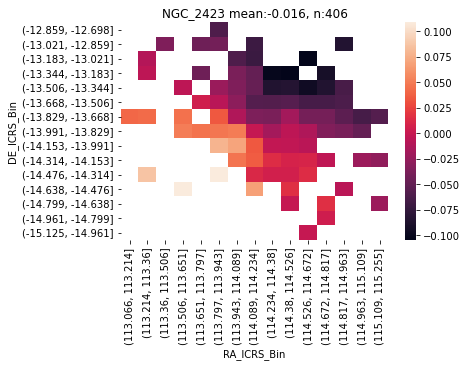

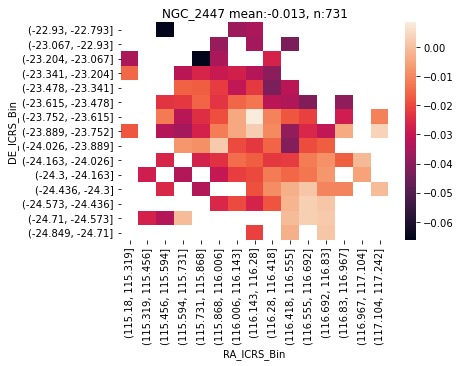

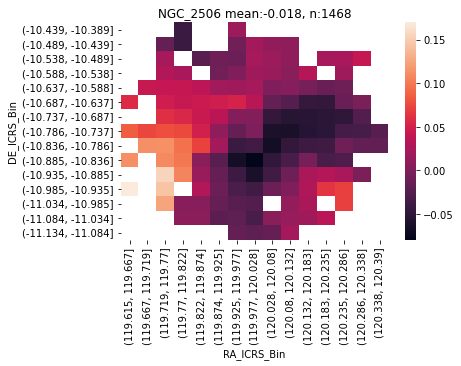

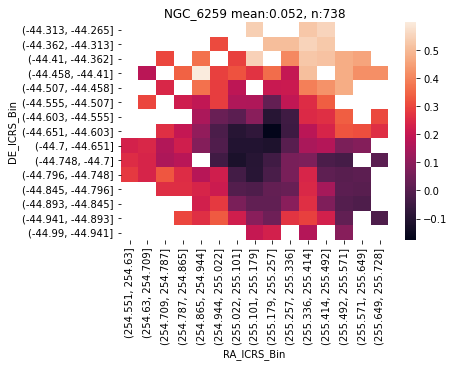

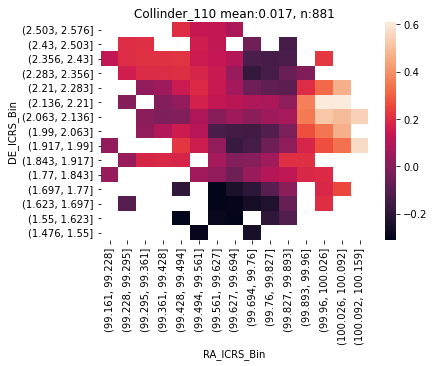

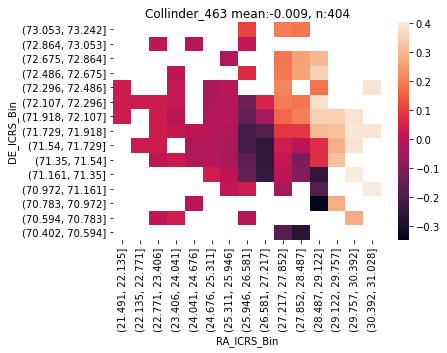

In [27]:
dered_tables = glob.glob("data/test/*_dered.vot")
for t in dered_tables:
    cluster_name = t.split("/")[-1].replace("_dered.vot", "")
    df = Table.read(t).to_pandas()
    df["median_delta_abscissa"] = df["median_delta_abscissa_0"] + df["median_delta_abscissa_1"]
    binned_heatmap(df, cluster_name)

In [39]:
def binned_support(
    df: pd.DataFrame,
    cluster_name: str,
    x_col: str = "RA_ICRS",
    y_col: str = "DE_ICRS",
    z_col: str = "median_delta_abscissa",
    nBins: int = 15
) -> None:
    
    """
    Create a heat map for binned data using z_value as the color
    reference: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    """

    df = df.copy()
    cuts = pd.DataFrame({str(feature) + '_Bin' : pd.cut(df[feature], nBins) for feature in [x_col, y_col]})
    
    counts = df.join(cuts).groupby( list(cuts) ).count()
    counts = counts.unstack(level = 0)
    counts = counts.iloc[::-1]
    
    means = df.join(cuts).groupby( list(cuts) ).mean()
    means = means.unstack(level = 0)
    means = means.iloc[::-1]
    
    plt.clf()
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'{cluster_name.replace("_", " ")}')
    ax1 = plt.subplot(121)
    sns.heatmap(means[z_col])
    plt.title("Δ abscissa correction (mag)")
    ax2 = plt.subplot(122, sharey=ax1)
    sns.heatmap(counts[z_col], cmap="YlGnBu")
    plt.title("Source density per bin")
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.show()
    # plt.savefig(f"plots/maps/{cluster_name}_map_count.png")
    # plt.close()

<Figure size 432x288 with 0 Axes>

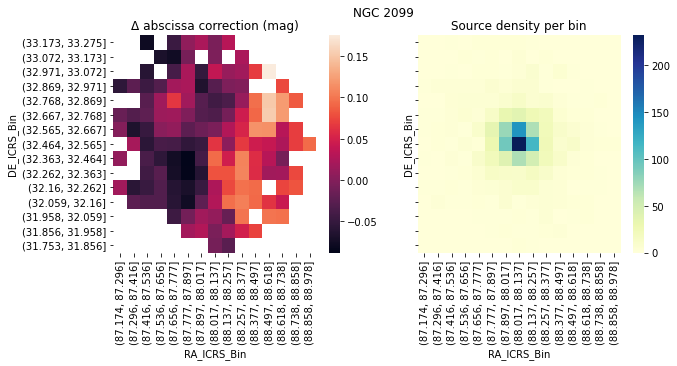

<Figure size 432x288 with 0 Axes>

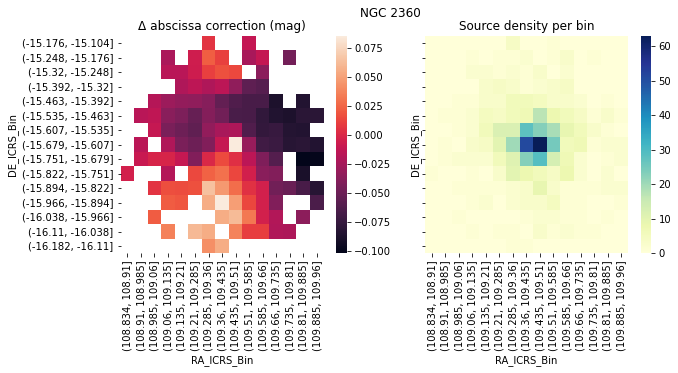

<Figure size 432x288 with 0 Axes>

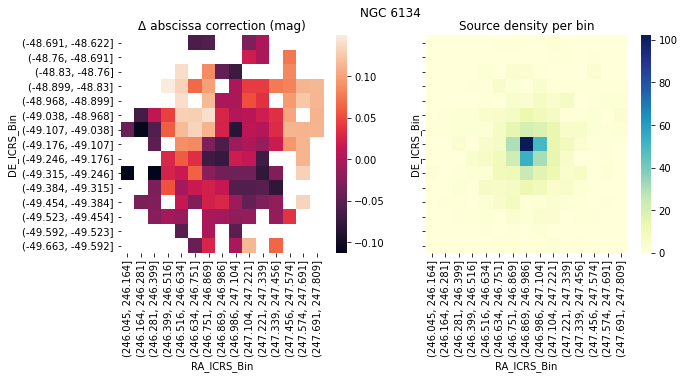

<Figure size 432x288 with 0 Axes>

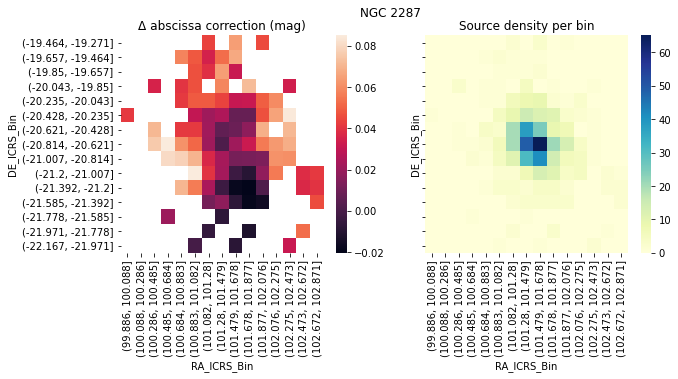

<Figure size 432x288 with 0 Axes>

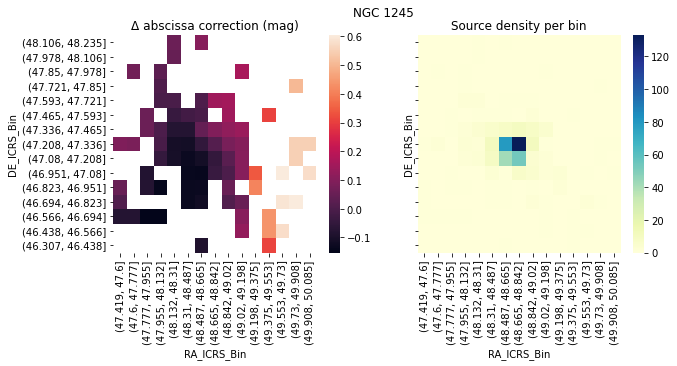

<Figure size 432x288 with 0 Axes>

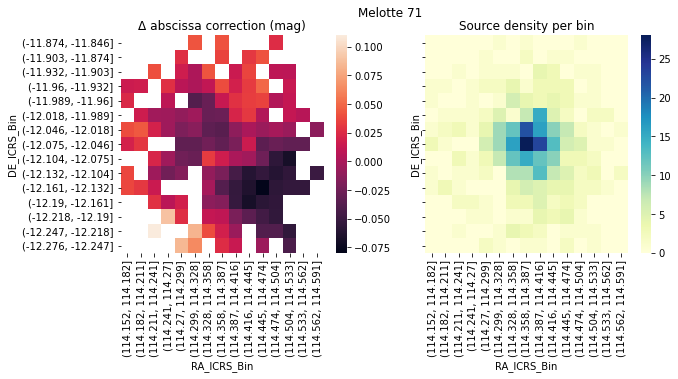

<Figure size 432x288 with 0 Axes>

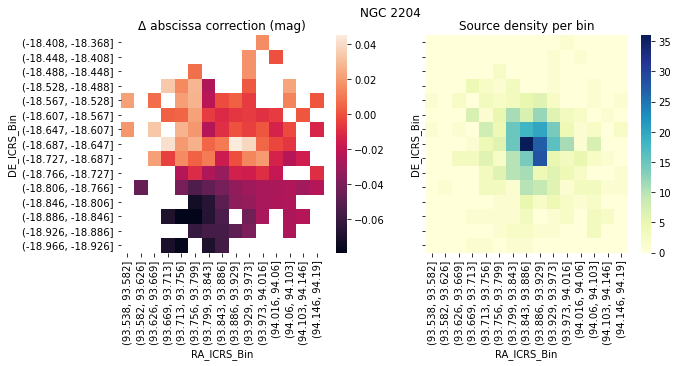

<Figure size 432x288 with 0 Axes>

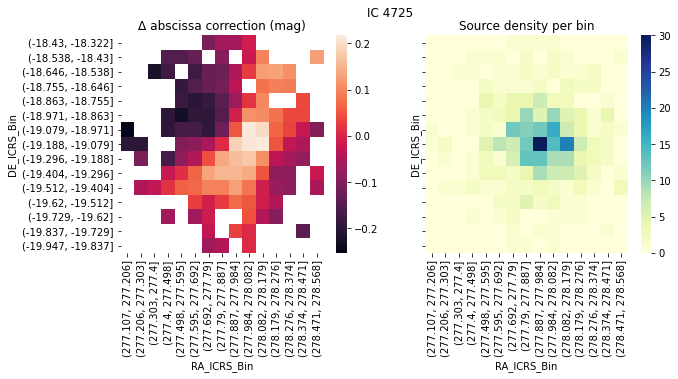

<Figure size 432x288 with 0 Axes>

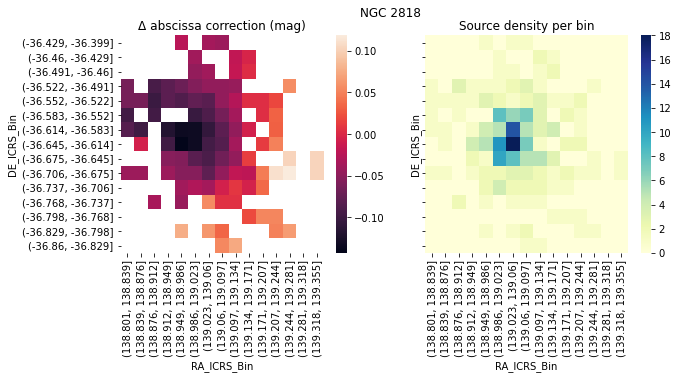

<Figure size 432x288 with 0 Axes>

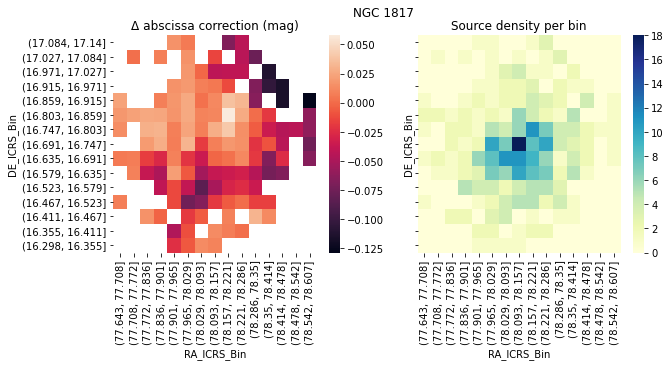

<Figure size 432x288 with 0 Axes>

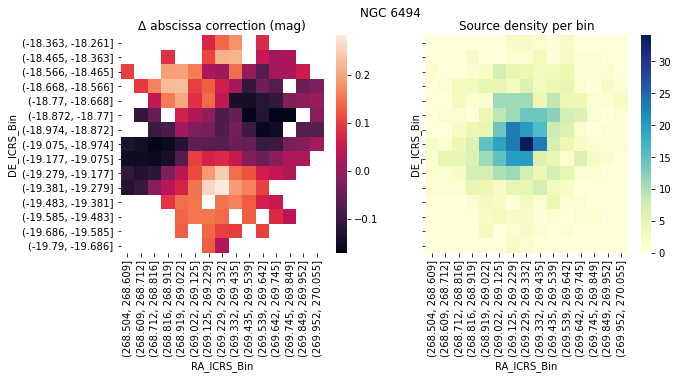

<Figure size 432x288 with 0 Axes>

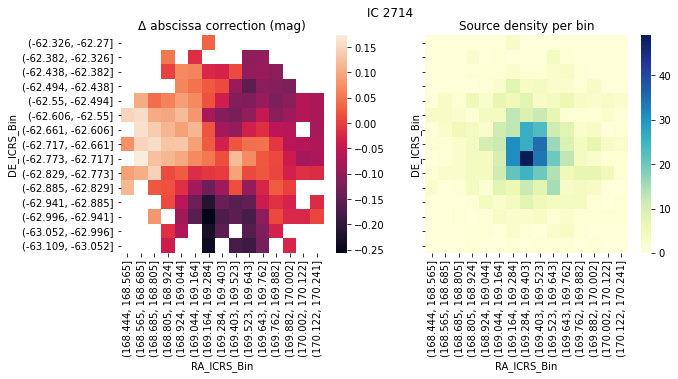

<Figure size 432x288 with 0 Axes>

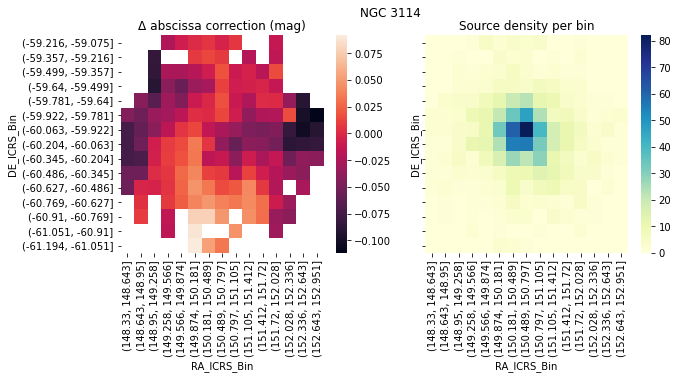

<Figure size 432x288 with 0 Axes>

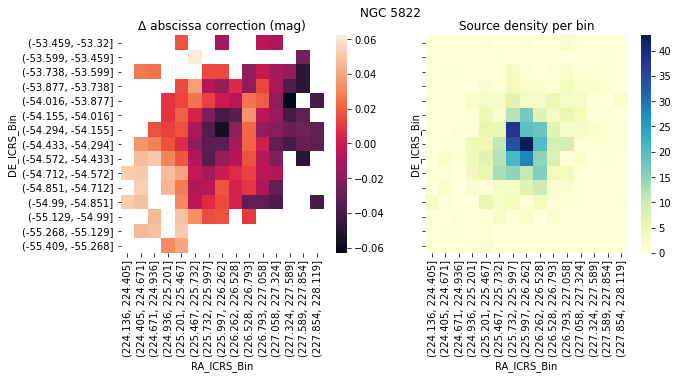

<Figure size 432x288 with 0 Axes>

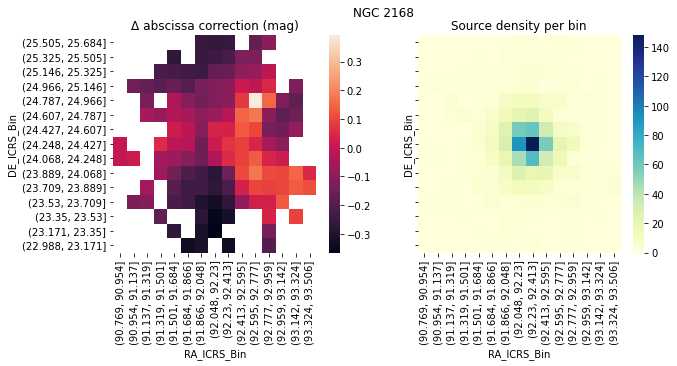

<Figure size 432x288 with 0 Axes>

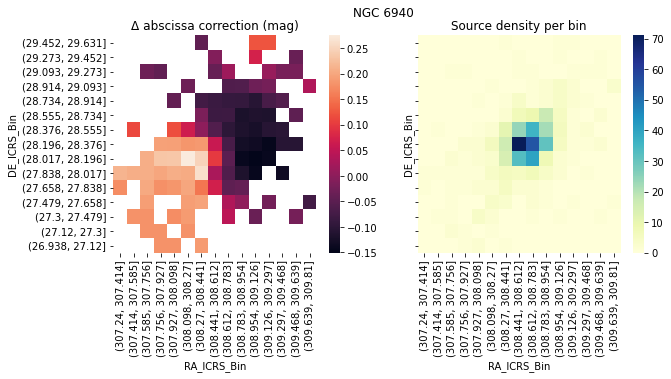

<Figure size 432x288 with 0 Axes>

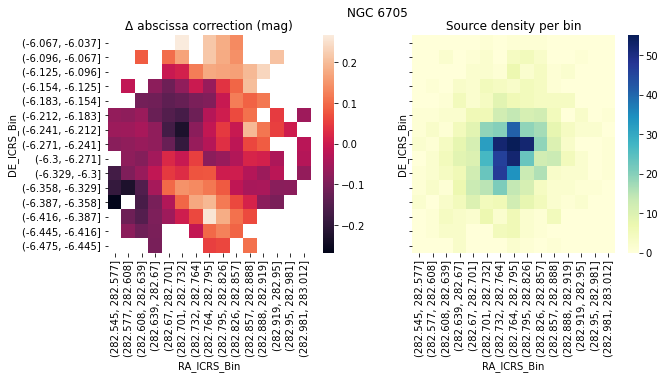

<Figure size 432x288 with 0 Axes>

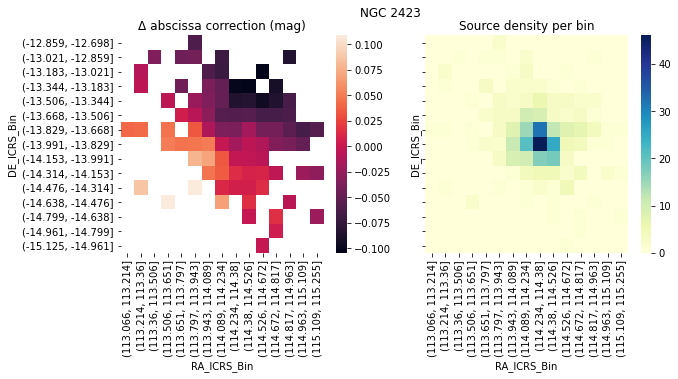

<Figure size 432x288 with 0 Axes>

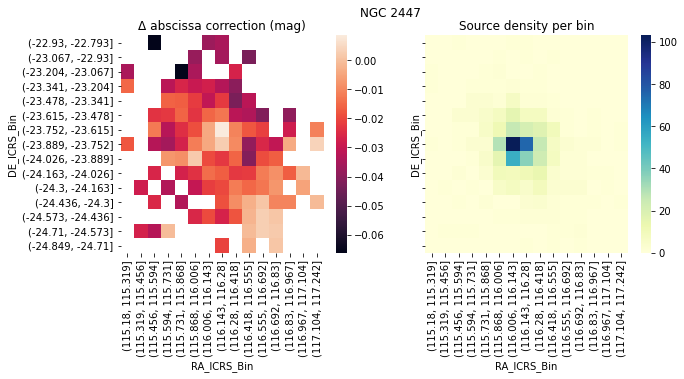

<Figure size 432x288 with 0 Axes>

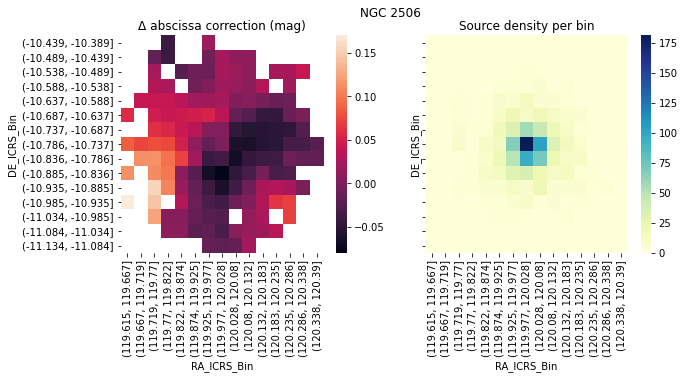

<Figure size 432x288 with 0 Axes>

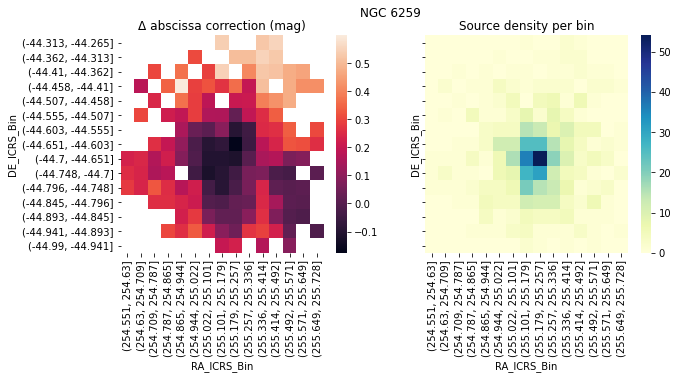

<Figure size 432x288 with 0 Axes>

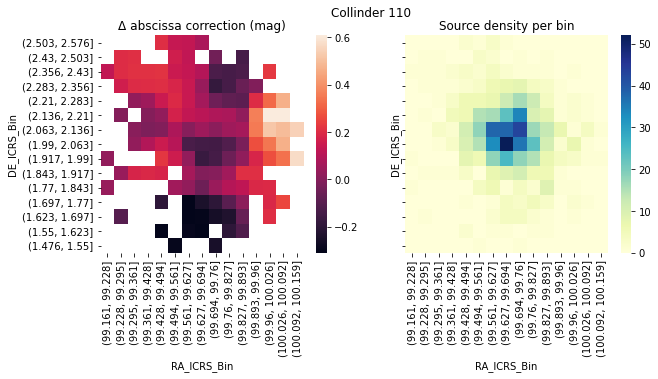

<Figure size 432x288 with 0 Axes>

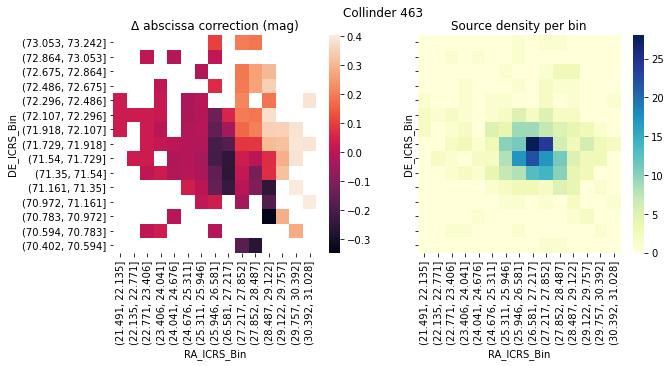

In [40]:
dered_tables = glob.glob("data/test/*_dered.vot")
for t in dered_tables:
    cluster_name = t.split("/")[-1].replace("_dered.vot", "")
    df = Table.read(t).to_pandas()
    df["median_delta_abscissa"] = df["median_delta_abscissa_0"] + df["median_delta_abscissa_1"]
    binned_support(df, cluster_name)